# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# Following https://stackoverflow.com/a/64604031
import sys

from pathlib import Path

# Importing data from .csv's

In [3]:
# Setting data directory absolute path
data_path = str(Path.cwd())
data_path

'/home/carlos/projects/Ayudantia/projects'

In [20]:
# Using a loop to add data to a dataframe
median_bin_list = list() 

bin_names = ['-1','0','1','2','4','6','7','8','9','10','Complete']

for name in bin_names:
    median_bin_list.append({name : pd.read_csv(data_path+"/slopes/linear_fit_median_bin_"+name+".csv")
                           })
median_bin_list[0]['-1']['deg']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
Name: deg, dtype: int64

# Plotting and saving

In [5]:
# Max degree of the polynomials, could calculate from the number of rows in each df
# and validate that all .csv have the same number of rows
max_degree = 15

In [6]:
results_path = 'plots/median_deg/'

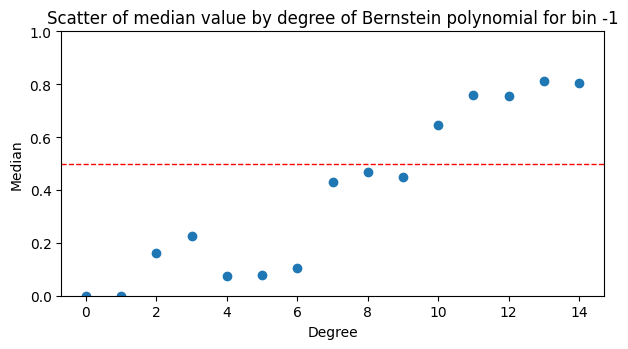

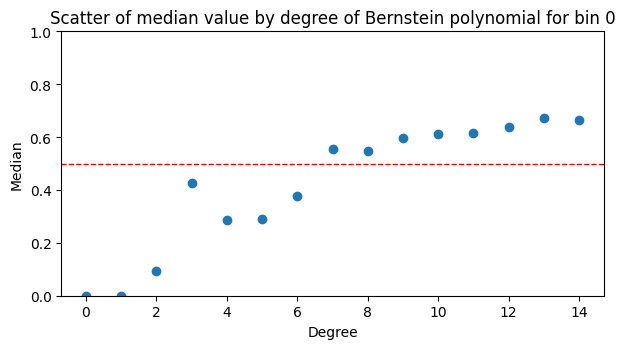

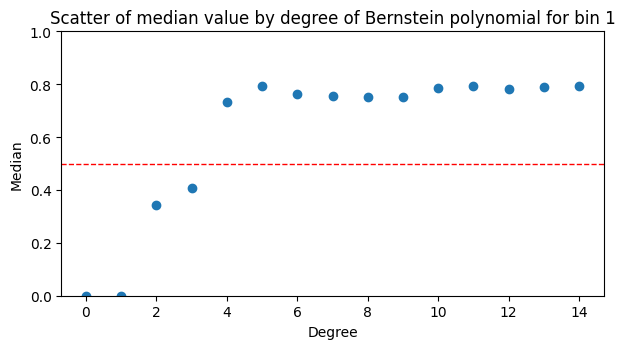

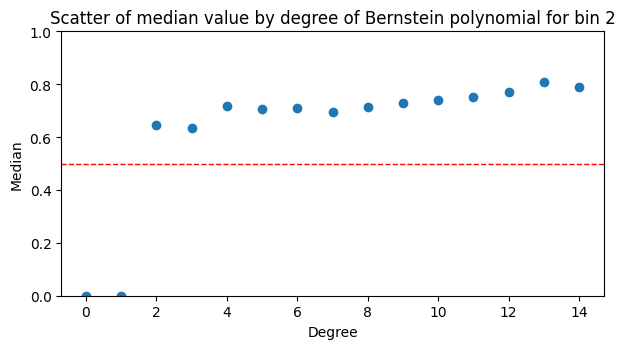

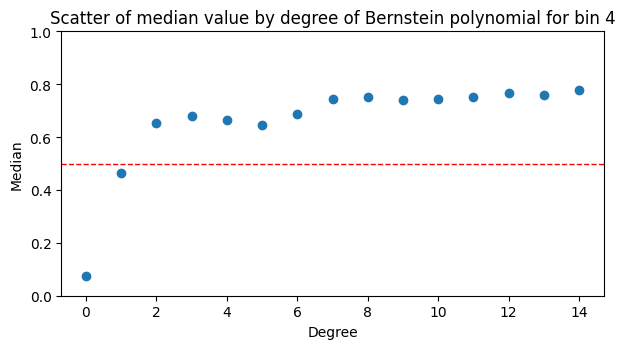

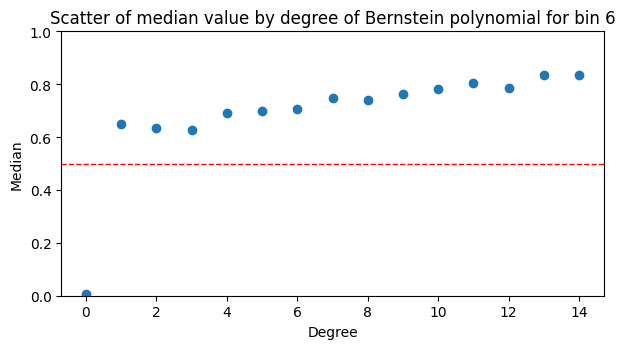

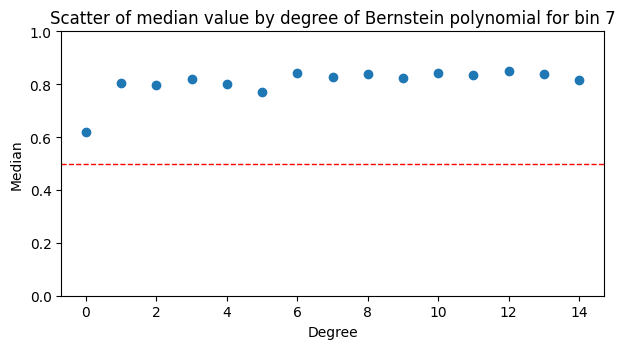

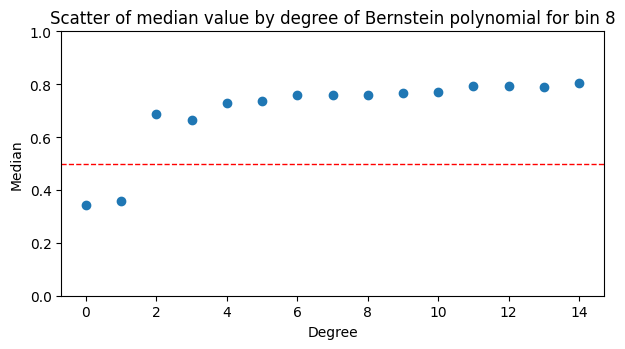

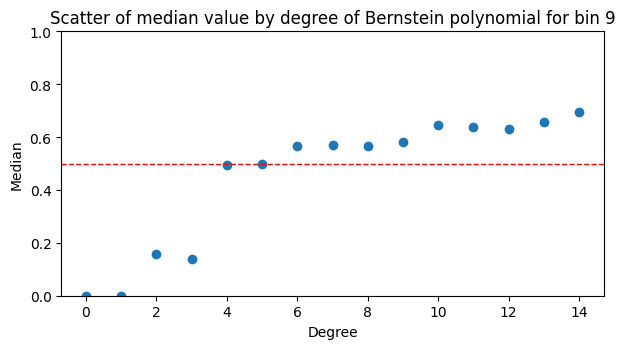

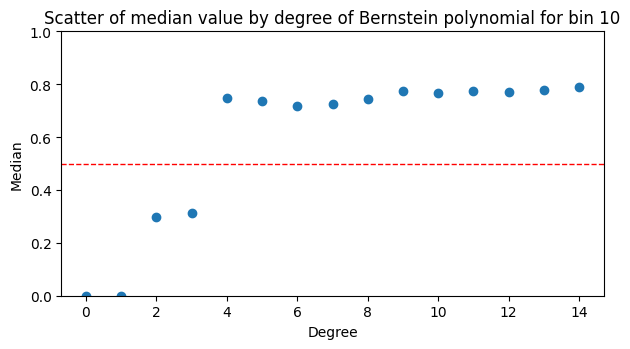

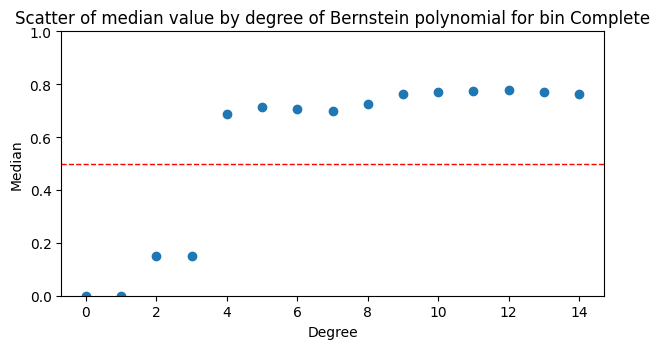

In [7]:
i = 0
for item in median_bin_list:
    
    # Defining data for the x and y axis
    x = item[bin_names[i]]['deg'].tolist()
    y = item[bin_names[i]]['median'].tolist()
    
    # Plotting
    plt.subplots(figsize=(7, 3.5), dpi=100)
    plt.scatter(x, y)
    
    # Defining title and labels
    plt.title('Scatter of median value by degree of Bernstein polynomial for bin ' + bin_names[i])
    plt.xlabel('Degree')
    plt.ylabel('Median')
    
    #plt. (0.5, 0, max_degree, color='red', linestyle='dashed', linewidth=1)
    plt.axline((0, 0.5), slope = 0, color='red', linestyle='dashed', linewidth=1)
    
    # Saving each plot in their folder
    plt.savefig(results_path+'median_deg-bin_'+bin_names[i]+'.png')
    
    # Setting max and min in y axis
    ax = plt.gca()
    ax.set_ylim([0, 1])
    
    plt.show()
    
    i = i+1
    

# Comparison with Horacio's results

In [8]:
# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[2]/"scripts")

if module_path not in sys.path:
    sys.path.append(module_path)

In [9]:
import tools

In [10]:
eff_path = str(Path.cwd().parents[2] / "data" / "Efficiency" )

In [21]:
# Reading the data
bin_name_path = 1
best_fits_list = list()

h_bin_list = bin_names

del h_bin_list[0]
del h_bin_list[len(h_bin_list)-1]

for item in h_bin_list:
    best_fits_list.append(tools.read_json(eff_path+f'/Nominal_eff_Bin{item}.json'))

In [29]:
best_fits_list[6]

{'8_c^0_13': {'value': 0.14727056253729032},
 '8_c^1_13': {'value': 0.039070536615216256},
 '8_c^10_13': {'value': 0.0},
 '8_c^11_13': {'value': 0.25356201121754146},
 '8_c^12_13': {'value': 0.18381808373061528},
 '8_c^13_13': {'value': 0.10358438133268147},
 '8_c^2_13': {'value': 0.4185159087937532},
 '8_c^3_13': {'value': 0.0},
 '8_c^4_13': {'value': 0.037995109544651094},
 '8_c^5_13': {'value': 0.2931188931619095},
 '8_c^6_13': {'value': 0.0},
 '8_c^7_13': {'value': 0.0},
 '8_c^8_13': {'value': 0.4571511155179289},
 '8_c^9_13': {'value': 0.0},
 'covariance': [[0.000472603846418928,
   -0.00045310046961824637,
   -0.00011732892438498345,
   0.00011861894373173384,
   -1.9639337488414523e-05,
   -0.00017244821702481287,
   0.0011978957744860207,
   -0.0010312690578619616,
   0.00022864199900476942],
  [-0.00045310046961824637,
   0.007915208994388943,
   0.0019369977909094705,
   0.001996429017929734,
   0.000919352887841394,
   -0.005344756337715267,
   0.009022633211846603,
   -0.00

In [ ]:
print('JUST KEYS \n\n\n')
for key in params_json:
    print(key)
print('\n\n\n KEY - VALUE PAIR \n\n\n')
for key, value in params_json.items():
    print(key+':', value)

In [27]:
h_deg_list = list()
i = 0
for item in best_fits_list:
    h_deg = 0
    bin_name_path = h_bin_list[i]

    for key in item:
        if '_c^' in key:
            h_deg = h_deg + 1
    h_deg_list.append({str(bin_name_path): h_deg-1})
    i = i+1
h_deg_list

[{'0': 7},
 {'1': 8},
 {'2': 2},
 {'4': 2},
 {'6': 1},
 {'7': 11},
 {'8': 13},
 {'9': 6},
 {'10': 5}]